In [17]:
import skimage
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import ORB
import matplotlib.pyplot as plt
from skimage.viewer import ImageViewer
from skimage.feature import match_descriptors
from skimage.feature import plot_matches
from skimage.transform import ProjectiveTransform
from skimage.measure import ransac
from skimage.transform import SimilarityTransform

In [2]:
#Importing the images
img1=rgb2gray(imread("/home/madhav/Downloads/1.jpeg"))
img2=rgb2gray(imread("/home/madhav/Downloads/2.jpeg"))


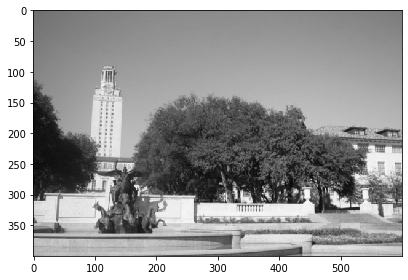

In [3]:
skimage.io.imshow(img1)
plt.show()

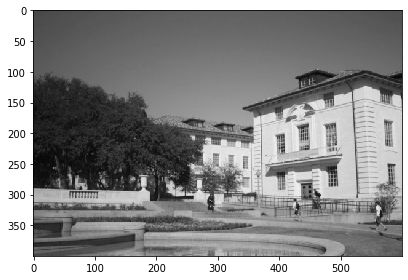

In [4]:
skimage.io.imshow(img2)
plt.show()

In [5]:
orb = ORB(n_keypoints=2000, fast_threshold=0.05)

# Detect keypoints in img1
orb.detect_and_extract(img1)
keypoints0 = orb.keypoints
descriptors0 = orb.descriptors

# Detect keypoints in img2
orb.detect_and_extract(img2)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

In [6]:
img1.shape

(400, 600)

In [7]:
keypoints1.shape, descriptors1.shape

((2000, 2), (2000, 256))

In [8]:
matches01 = match_descriptors(descriptors0, descriptors1, cross_check=True)


In [9]:
matches01.shape

(733, 2)

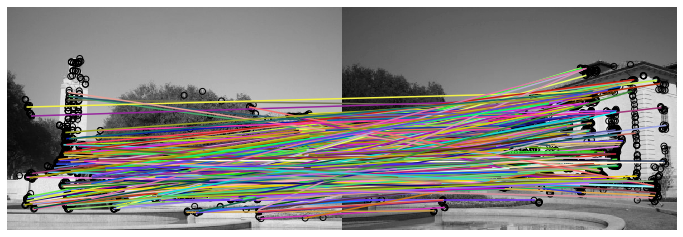

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) 
plot_matches(ax, img1, img2, keypoints0, keypoints1, matches01)
ax.axis('off');

In [22]:
dst = keypoints1[matches01[:, 1]][:, ::-1]
src = keypoints0[matches01[:, 0]][:, ::-1]
model_robust01, inliers01 = ransac((src, dst), ProjectiveTransform, min_samples=4, residual_threshold=1, max_trials=300)
src = keypoints1[matches12[:, 1]][:, ::-1]
dst = keypoints0[matches12[:, 0]][:, ::-1]

model_robust12, inliers12 = ransac((src, dst), ProjectiveTransform,
                                   min_samples=4, residual_threshold=1, max_trials=300)

NameError: name 'matches12' is not defined

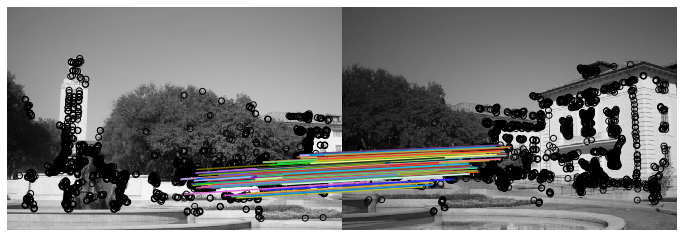

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
plot_matches(ax, img1, img2, keypoints0, keypoints1, matches01[inliers01])
ax.axis('off');

In [18]:
r, c = img1.shape[:2]

In [ ]:
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])
warped_corners01 = model_robust01(corners)